In [ ]:
#mount drive

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#make folder for storage
!mkdir data

#unzip files

!unzip /content/drive/MyDrive/CS176Project/aqi-small.zip -d /content/data
!unzip /content/drive/MyDrive/CS176Project/city-world-air-quality-coordinates.zip -d /content/data
!unzip /content/drive/MyDrive/CS176Project/world-air-quality-pollution.zip -d /content/data

mkdir: cannot create directory ‘data’: File exists
Archive:  /content/drive/MyDrive/CS176Project/aqi-small.zip
replace /content/data/data_date.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/MyDrive/CS176Project/city-world-air-quality-coordinates.zip
replace /content/data/AQI and Lat Long of Countries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Archive:  /content/drive/MyDrive/CS176Project/world-air-quality-pollution.zip
replace /content/data/cities_air_quality_water_pollution.18-10-2021 (1).csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [85]:
#import libraries

import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [86]:
#convert to dataframe and display

directory = '/content/data'

def to_df(filename):
  f = os.path.join(directory, filename)
  df = pd.read_csv(f)
  return df

city_aqi_df = to_df('cities_air_quality_water_pollution.18-10-2021 (1).csv')
display(city_aqi_df)

aqi_lat_long_df = to_df('AQI and Lat Long of Countries.csv')
display(aqi_lat_long_df)

aqi_small_df = to_df('data_date.csv')
display(aqi_small_df)

,City,"""Region""","""Country""","""AirQuality""","""WaterPollution"""
0,New York City,"""New York""","""United States of America""",46.816038,49.504950
1,"Washington, D.C.","""District of Columbia""","""United States of America""",66.129032,49.107143
2,San Francisco,"""California""","""United States of America""",60.514019,43.000000
3,Berlin,"""""","""Germany""",62.364130,28.612717
4,Los Angeles,"""California""","""United States of America""",36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,"""Medina Province""","""Saudi Arabia""",0.000000,50.000000
3959,Cordoba,"""Andalusia""","""Spain""",85.714286,8.333333
3960,Vic,"""Catalonia""","""Spain""",100.000000,0.000000
3961,Segovia,"""Castile and Leon""","""Spain""",100.000000,0.000000


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-11.2958,-41.9869
3,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
4,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16690,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
16691,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
16692,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,36.3385,-88.8513
16693,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
12981,2023-08-10,Uzbekistan,Good,28
12982,2023-08-10,Vatican,Good,34
12983,2023-08-10,Venezuela,Good,26
12984,2023-08-10,Vietnam,Unhealthy for Sensitive Groups,142


In [87]:
#aqi_lat_long_df has some duplicate entries, so drop them

aqi_lat_long_df = aqi_lat_long_df.drop_duplicates(subset=['Country', 'City'], ignore_index=True)

display(aqi_lat_long_df)

# Editing column names for city_aqi_df for better accessibility
city_aqi_df.columns = ['City', 'Region', 'Country', 'AirQuality', 'WaterPollution']
city_aqi_df['Region'] = city_aqi_df['Region'].replace({'["\']': ''}, regex = True)
city_aqi_df['Country'] = city_aqi_df['Country'].replace({'["\']': ''}, regex = True)

# renaming status 'unhealthy for sensitive groups' to 'slightly unhealthy' for easier reading
aqi_small_df.replace(to_replace = 'Unhealthy for Sensitive Groups', value = 'Slightly Unhealthy', inplace = True)

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate,44.7444,44.2031
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good,-5.2900,-44.4900
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate,37.1667,15.1833
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good,53.0167,20.8833
4,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate,16.1005,-88.8074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14224,China,Shaoguan,160,Unhealthy,3,Good,160,Unhealthy,1,Good,79,Moderate,24.8011,113.5927
14225,United States of America,Highland Springs,54,Moderate,1,Good,34,Good,5,Good,54,Moderate,37.5516,-77.3285
14226,Slovakia,Martin,71,Moderate,1,Good,39,Good,1,Good,71,Moderate,49.0650,18.9219
14227,France,Sceaux,50,Good,1,Good,20,Good,5,Good,50,Good,48.7786,2.2906


In [88]:
aqi_lat_long_df.columns

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category', 'lat', 'lng'],
      dtype='object')

In [89]:
# Sort first dataset based on overall water pollution value, displaying top 10 results
city_aqi_df = city_aqi_df.sort_values('WaterPollution', ascending=False)
display(city_aqi_df.head(15))

# Sort second dataset by AQI, displaying top 10 results
aqi_lat_long_df = aqi_lat_long_df.sort_values('AQI Value', ascending=False)
display(aqi_lat_long_df.head(15))

# Sort third dataset by AQI, then using groupby for countries and display the top 5 values for each
# Note: The third dataset's aqi values end at 100, which is a drawback and could cause problems for our analysis.
aqi_small_df = aqi_small_df.sort_values('AQI Value', ascending=False)
aqis = aqi_small_df.groupby('Country')
for name, group in aqis:
    print(group.head(5))


,City,Region,Country,AirQuality,WaterPollution
702,Pasay,Metro Manila,Philippines,25.0,100.0
2761,Labasa,Northern Division,Fiji,50.0,100.0
1177,San Fernando,,Philippines,0.0,100.0
406,Barquisimeto,Lara,Venezuela,25.0,100.0
3536,Kluang,Johor,Malaysia,75.0,100.0
3812,Rutherford,Tennessee,United States of America,0.0,100.0
402,Rancagua,OHiggins Region,Chile,0.0,100.0
3809,Bomassa,Sangha Department,Republic of the Congo,0.0,100.0
3546,Dondo,Sofala,Mozambique,50.0,100.0
2103,Kaifeng,Henan,Peoples Republic of China,0.0,100.0


,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
6596,India,Dhanaura,500,Hazardous,3,Good,143,Unhealthy for Sensitive Groups,4,Good,428,Hazardous,25.1905,87.2595
4287,India,Nawalgarh,500,Hazardous,1,Good,33,Good,0,Good,412,Hazardous,27.8500,75.2700
180,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous,29.9928,73.2536
3183,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,24.0250,-104.6675
4779,India,Etah,500,Hazardous,1,Good,50,Good,3,Good,437,Hazardous,27.6300,78.6700
1415,India,Phalodi,500,Hazardous,0,Good,34,Good,0,Good,467,Hazardous,27.1310,72.3640
3172,India,Delhi,500,Hazardous,1,Good,44,Good,2,Good,446,Hazardous,28.6100,77.2300
13529,Russian Federation,Tynda,500,Hazardous,21,Good,8,Good,17,Good,475,Hazardous,55.1667,124.7167
6356,India,Maur,500,Hazardous,1,Good,62,Moderate,1,Good,433,Hazardous,30.0833,75.2500
495,India,Mahendragarh,500,Hazardous,1,Good,42,Good,0,Good,435,Hazardous,28.2800,76.1500


             Date  Country              Status  AQI Value
1976   2022-07-30  Albania  Slightly Unhealthy        111
10129  2023-03-30  Albania            Moderate         72
10267  2023-04-06  Albania            Moderate         66
3950   2022-08-13  Albania            Moderate         61
1694   2022-07-28  Albania            Moderate         61
             Date  Country    Status  AQI Value
12854  2023-08-10  Algeria  Moderate         99
12322  2023-07-20  Algeria  Moderate         82
11513  2023-06-08  Algeria  Moderate         80
12589  2023-08-03  Algeria  Moderate         76
12187  2023-07-13  Algeria  Moderate         75
             Date  Country    Status  AQI Value
5926   2022-08-26  Andorra  Moderate         71
11918  2023-06-29  Andorra  Moderate         65
5644   2022-08-24  Andorra  Moderate         60
2      2022-07-21  Andorra  Moderate         55
3952   2022-08-13  Andorra  Moderate         54
             Date Country     Status  AQI Value
3389   2022-08-09  Angola  U

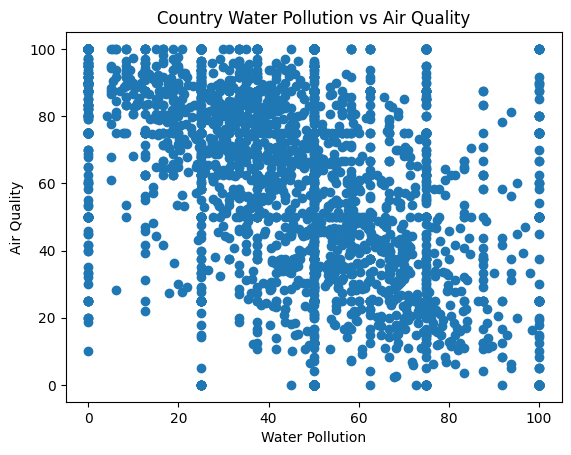

In [90]:
# Scatterplot of the city aqi dataset with water pollution on the x-axis and air quality on the y axis
fig, ax = plt.subplots()
ax.scatter(city_aqi_df['WaterPollution'], city_aqi_df['AirQuality'])
ax.set_xlabel('Water Pollution')
ax.set_ylabel('Air Quality')
ax.set_title('Country Water Pollution vs Air Quality')
plt.show()

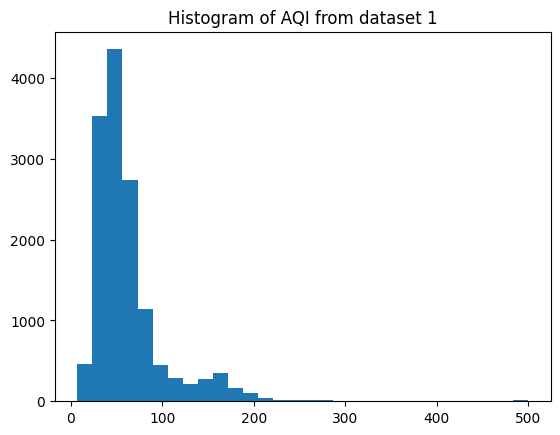

In [91]:
# Histogram of the air quality indices in the lat_long dataset
fig, ax = plt.subplots()
ax.hist(aqi_lat_long_df['AQI Value'], bins=30)
ax.set_title("Histogram of AQI from dataset 1")
plt.show()

<ipython-input-92-c9dc2618df63>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(aqi_small_df['Status'].unique(), rotation = 90)


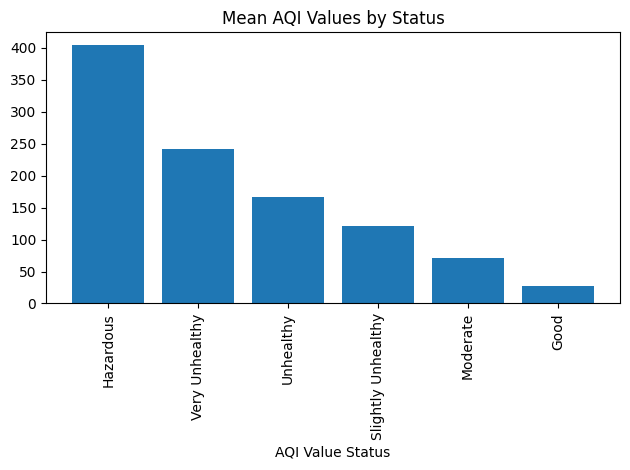

In [92]:
# Barplot of mean of overall small aqi dataset with the status as the different colors
fig, ax = plt.subplots()

means = {}
for category in list(aqi_small_df['Status'].unique()):
  means[category] = int(aqi_small_df[aqi_small_df['Status'] == category][['AQI Value']].mean())

ax.set_title("Mean AQI Values by Status")
ax.set_xticklabels(aqi_small_df['Status'].unique(), rotation = 90)
ax.set_xlabel('AQI Value Status')
ax.bar(means.keys(), means.values())
fig.tight_layout()

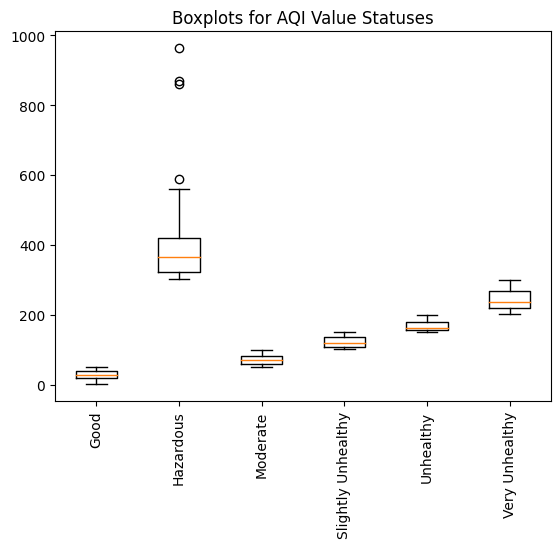

In [93]:
# Boxplot of overall small aqi dataset with the status (with length 6)
category_labels = [0, 0, 0, 0, 0, 0]
data_groups = [0, 0, 0, 0, 0, 0]
index = 0

for category, cat_data in aqi_small_df.groupby('Status'):
    category_labels[index] = category
    data_groups[index] = list(cat_data['AQI Value'])
    index += 1

fig, ax = plt.subplots()
ax.boxplot(data_groups)
ax.set_xticklabels(category_labels, rotation=90)
ax.set_title('Boxplots for AQI Value Statuses')
plt.show()

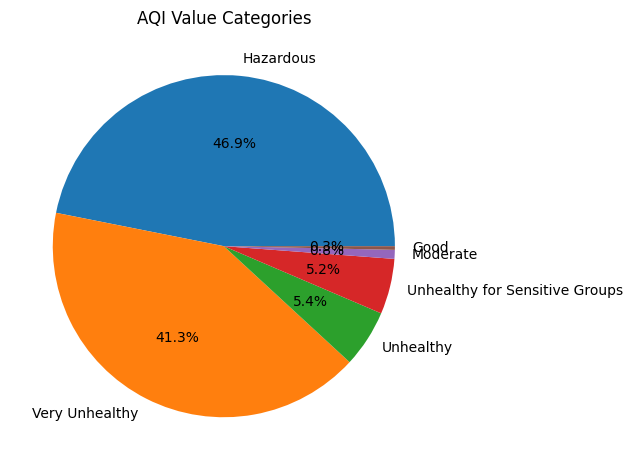

In [94]:
# Making a pie chart of aqi_large dataframe's aqi value categories
category_labels = aqi_lat_long_df['AQI Category'].unique()

fig, ax = plt.subplots()
ax.pie(aqi_lat_long_df['AQI Category'].value_counts(), labels=category_labels, autopct='%1.1f%%')
ax.set_title('AQI Value Categories')
fig.tight_layout()
plt.show()

In [95]:
#filter dfs for cities with poor air quality

city_aqi_df_poor = city_aqi_df[city_aqi_df['AirQuality'] < 20].reset_index()
display(city_aqi_df_poor)

aqi_lat_long_df_poor = aqi_lat_long_df[aqi_lat_long_df['AQI Value'] > 100].reset_index()
display(aqi_lat_long_df_poor)

aqi_small_df_poor = aqi_small_df[aqi_small_df['AQI Value'] > 100].reset_index()
display(aqi_small_df_poor)

,index,City,Region,Country,AirQuality,WaterPollution
0,1177,San Fernando,,Philippines,0.00,100.0
1,3812,Rutherford,Tennessee,United States of America,0.00,100.0
2,402,Rancagua,OHiggins Region,Chile,0.00,100.0
3,3809,Bomassa,Sangha Department,Republic of the Congo,0.00,100.0
4,2103,Kaifeng,Henan,Peoples Republic of China,0.00,100.0
...,...,...,...,...,...,...
458,2814,Port Lincoln,South Australia,Australia,0.00,25.0
459,343,Coyhaique,Aysen Region,Chile,0.00,25.0
460,3736,Ilford,England,United Kingdom,0.00,25.0
461,1375,Diyarbakir,Diyarbakir Province,Turkey,18.75,0.0


,index,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,6596,India,Dhanaura,500,Hazardous,3,Good,143,Unhealthy for Sensitive Groups,4,Good,428,Hazardous,25.1905,87.2595
1,4287,India,Nawalgarh,500,Hazardous,1,Good,33,Good,0,Good,412,Hazardous,27.8500,75.2700
2,180,Pakistan,Bahawalnagar,500,Hazardous,1,Good,38,Good,1,Good,466,Hazardous,29.9928,73.2536
3,3183,United States of America,Durango,500,Hazardous,133,Unhealthy for Sensitive Groups,0,Good,53,Moderate,500,Hazardous,24.0250,-104.6675
4,4779,India,Etah,500,Hazardous,1,Good,50,Good,3,Good,437,Hazardous,27.6300,78.6700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1656,2537,NaN,Alcudia,101,Unhealthy for Sensitive Groups,1,Good,49,Good,1,Good,101,Unhealthy for Sensitive Groups,39.8525,3.1192
1657,1609,Nigeria,Sapele,101,Unhealthy for Sensitive Groups,4,Good,21,Good,3,Good,101,Unhealthy for Sensitive Groups,5.8261,5.6536
1658,12337,China,Laibin,101,Unhealthy for Sensitive Groups,2,Good,101,Unhealthy for Sensitive Groups,2,Good,79,Moderate,23.7333,109.2333
1659,4081,Indonesia,Medan,101,Unhealthy for Sensitive Groups,2,Good,54,Moderate,1,Good,101,Unhealthy for Sensitive Groups,3.5894,98.6739


,index,Date,Country,Status,AQI Value
0,10575,2023-04-20,China,Hazardous,963
1,4365,2022-08-15,United Arab Emirates,Hazardous,868
2,4224,2022-08-14,United Arab Emirates,Hazardous,862
3,4435,2022-08-16,Iraq,Hazardous,590
4,10435,2023-04-13,China,Hazardous,560
...,...,...,...,...,...
1943,2769,2022-08-04,Mexico,Slightly Unhealthy,101
1944,1400,2022-07-26,Turkey,Slightly Unhealthy,101
1945,7879,2022-09-08,Uganda,Slightly Unhealthy,101
1946,10797,2023-04-27,Serbia,Slightly Unhealthy,101


In [96]:
# pivoting the city_aqi_df using a pivot table for easier reading
pivoted_city_aqi_df = city_aqi_df.pivot_table(index = ['Country', 'City', 'Region'], values = ['AirQuality', 'WaterPollution'])
display(pivoted_city_aqi_df)

AirQuality  \
Country      City     Region                                      
 Afghanistan Andkhoy   Faryab                         50.000000   
             Farah     Farah                         100.000000   
             Herat     Herat                          43.750000   
             Kabul     Kabul                          18.421053   
             Kandahar  Kandahar                        0.000000   
...                                                         ...   
 Zambia      Mansa     Luapula Province               75.000000   
 Zimbabwe    Bindura   Mashonaland Central Province   50.000000   
             Bulawayo                                 67.857143   
             Harare                                   38.461538   
             Masvingo                                 25.000000   

                                                     WaterPollution  
Country      City     Region                                         
 Afghanistan Andkhoy   Faryab                             50.000000  
             Farah     Farah                               0.000000  
             Herat     Herat                              31.250000  
             Kabul     Kabul                              81.060606  
             Kandahar  Kandahar                           75.000000  
...                                                             ...  
 Zambia      Mansa     Luapula Province                   25.000000  
 Zimbabwe    Bindura   Mashonaland Central Province       75.000000  
             Bulawayo                                     71.428571  
             Harare                                       87.500000  
             Masvingo                                     62.500000  

[3963 rows x 2 columns]

In [97]:
#merge dfs by country

city_df = pd.merge(aqi_small_df, aqi_lat_long_df, how='inner')
display(city_df)

#make a pivot table for city_df

city_pivot_table = city_df.pivot_table(index = ['Date', 'Country', 'City'], values=['AQI Value', 'lat', 'lng'])
display(city_pivot_table)

,Date,Country,Status,AQI Value,City,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category,lat,lng
0,2023-04-27,India,Very Unhealthy,256,Nokha,Very Unhealthy,1,Good,33,Good,2,Good,256,Very Unhealthy,27.6000,73.4200
1,2023-04-20,India,Very Unhealthy,235,Basi,Very Unhealthy,1,Good,49,Good,0,Good,235,Very Unhealthy,30.5872,76.8428
2,2023-04-20,India,Very Unhealthy,235,Dhaka,Very Unhealthy,3,Good,158,Unhealthy,1,Good,235,Very Unhealthy,23.7639,90.3889
3,2022-08-13,India,Very Unhealthy,234,Samthar,Very Unhealthy,1,Good,47,Good,0,Good,234,Very Unhealthy,25.8400,78.9000
4,2022-07-22,India,Very Unhealthy,226,Datia,Very Unhealthy,1,Good,48,Good,0,Good,226,Very Unhealthy,25.6700,78.4700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2023-05-11,Argentina,Good,14,Mercedes,Good,1,Good,14,Good,0,Good,3,Good,-33.2500,-58.0333
10834,2023-06-15,Argentina,Good,13,Corrientes,Good,1,Good,12,Good,0,Good,13,Good,-27.4833,-58.8167
10835,2023-06-15,Argentina,Good,13,Ushuaia,Good,0,Good,13,Good,0,Good,0,Good,-54.8019,-68.3031
10836,2023-08-10,Argentina,Good,12,General Roca,Good,0,Good,12,Good,1,Good,5,Good,-39.0333,-67.5833


AQI Value      lat      lng
Date       Country City                                      
2022-07-21 Belgium Anderlues             67  50.4080   4.2696
                   Arlon                 61  49.6833   5.8167
                   Blegny                61  50.6667   5.7333
                   Hoeilaart             67  50.7667   4.4667
                   Theux                 61  50.5349   5.8134
...                                     ...      ...      ...
2023-08-10 Ukraine Nova Vodolaha         55  49.7197  35.8772
                   Pavlohrad             39  48.5200  35.8700
                   Pidhorodne            39  48.5737  35.0966
                   Skvyra                55  49.7333  29.6833
                   Vyshhorod             39  50.5833  30.4853

[10755 rows x 3 columns]

In [98]:
# setting and sorting index by country and city respectively for easier reading for aqi_lat_long_df
indexed_aqi_lat_long_df = aqi_lat_long_df.set_index(['Country', 'City'])
sorted_aqi_lat_long_df = indexed_aqi_lat_long_df.sort_index()

display(sorted_aqi_lat_long_df)

AQI Value                    AQI Category  \
Country     City                                                    
Afghanistan Kabul              64                        Moderate   
            Taywarah           62                        Moderate   
            Zaranj            133  Unhealthy for Sensitive Groups   
Albania     Berat              91                        Moderate   
            Burrel            113  Unhealthy for Sensitive Groups   
...                           ...                             ...   
NaN         Workington         75                        Moderate   
            Worthing           54                        Moderate   
            Yokosuka           69                        Moderate   
            Ystad              37                            Good   
            Zanzibar           39                            Good   

                        CO AQI Value CO AQI Category  Ozone AQI Value  \
Country     City                                                        
Afghanistan Kabul                  0            Good               41   
            Taywarah               0            Good               39   
            Zaranj                 1            Good               46   
Albania     Berat                  1            Good               47   
            Burrel                 1            Good               43   
...                              ...             ...              ...   
NaN         Workington             0            Good               33   
            Worthing               0            Good               36   
            Yokosuka               1            Good               69   
            Ystad                  1            Good               37   
            Zanzibar               1            Good               20   

                       Ozone AQI Category  NO2 AQI Value NO2 AQI Category  \
Country     City                                                            
Afghanistan Kabul                    Good              0             Good   
            Taywarah                 Good              0             Good   
            Zaranj                   Good              0             Good   
Albania     Berat                    Good              0             Good   
            Burrel                   Good              0             Good   
...                                   ...            ...              ...   
NaN         Workington               Good              0             Good   
            Worthing                 Good              2             Good   
            Yokosuka             Moderate              2             Good   
            Ystad                    Good              1             Good   
            Zanzibar                 Good              0             Good   

                        PM2.5 AQI Value              PM2.5 AQI Category  \
Country     City                                                          
Afghanistan Kabul                    64                        Moderate   
            Taywarah                 62                        Moderate   
            Zaranj                  133  Unhealthy for Sensitive Groups   
Albania     Berat                    91                        Moderate   
            Burrel                  113  Unhealthy for Sensitive Groups   
...                                 ...                             ...   
NaN         Workington               75                        Moderate   
            Worthing                 54                        Moderate   
            Yokosuka                 45                            Good   
            Ystad                    30                            Good   
            Zanzibar                 39                            Good   

                            lat       lng  
Country     City                           
Afghanistan Kabul       34.5253   69.1783  
            Taywarah    33.5100   64.4200  
            Zaranj    

In [99]:
# pivoting aqi_small_df by date and stacking it so that date is the index
pivoted_aqi_small_df = aqi_small_df.pivot(columns = 'Date')
stacked_aqi_small_df = pivoted_aqi_small_df.stack()

# grouping aqi_small_df by date to get multiple separate dataframes for each day for every country
grouped_aqi_small_df = stacked_aqi_small_df.groupby('Date')
for group, group_df in grouped_aqi_small_df:
    display(group_df)

,,Country,Status,AQI Value
,Date,,,
0,2022-07-21,Albania,Good,14.0
1,2022-07-21,Algeria,Moderate,65.0
2,2022-07-21,Andorra,Moderate,55.0
3,2022-07-21,Angola,Slightly Unhealthy,113.0
4,2022-07-21,Argentina,Moderate,63.0
...,...,...,...,...
279,2022-07-21,Uzbekistan,Moderate,58.0
280,2022-07-21,Vatican,Moderate,70.0
281,2022-07-21,Venezuela,Good,2.0


,,Country,Status,AQI Value
,Date,,,
284,2022-07-22,Albania,Good,15.0
285,2022-07-22,Algeria,Moderate,65.0
286,2022-07-22,Andorra,Moderate,52.0
287,2022-07-22,Angola,Slightly Unhealthy,110.0
288,2022-07-22,Argentina,Moderate,53.0
...,...,...,...,...
702,2022-07-22,Uzbekistan,Slightly Unhealthy,116.0
703,2022-07-22,Vatican,Moderate,68.0
704,2022-07-22,Venezuela,Good,11.0


,,Country,Status,AQI Value
,Date,,,
707,2022-07-23,Albania,Good,15.0
708,2022-07-23,Algeria,Moderate,65.0
709,2022-07-23,Andorra,Good,33.0
710,2022-07-23,Angola,Slightly Unhealthy,105.0
711,2022-07-23,Argentina,Good,49.0
...,...,...,...,...
984,2022-07-23,Uzbekistan,Moderate,92.0
985,2022-07-23,Vatican,Moderate,68.0
986,2022-07-23,Venezuela,Good,20.0


,,Country,Status,AQI Value
,Date,,,
989,2022-07-24,Albania,Good,18.0
990,2022-07-24,Algeria,Moderate,65.0
991,2022-07-24,Andorra,Good,41.0
992,2022-07-24,Angola,Slightly Unhealthy,107.0
993,2022-07-24,Argentina,Good,42.0
...,...,...,...,...
1125,2022-07-24,Uzbekistan,Moderate,73.0
1126,2022-07-24,Vatican,Moderate,57.0
1127,2022-07-24,Venezuela,Good,4.0


,,Country,Status,AQI Value
,Date,,,
1130,2022-07-25,Albania,Moderate,55.0
1131,2022-07-25,Algeria,Moderate,65.0
1132,2022-07-25,Andorra,Good,16.0
1133,2022-07-25,Angola,Slightly Unhealthy,117.0
1134,2022-07-25,Argentina,Moderate,74.0
...,...,...,...,...
1266,2022-07-25,Uzbekistan,Moderate,57.0
1267,2022-07-25,Vatican,Moderate,61.0
1268,2022-07-25,Venezuela,Good,5.0


,,Country,Status,AQI Value
,Date,,,
1271,2022-07-26,Albania,Good,42.0
1272,2022-07-26,Algeria,Moderate,65.0
1273,2022-07-26,Andorra,Good,21.0
1274,2022-07-26,Angola,Moderate,92.0
1275,2022-07-26,Argentina,Good,35.0
...,...,...,...,...
1548,2022-07-26,Uzbekistan,Moderate,75.0
1549,2022-07-26,Vatican,Moderate,53.0
1550,2022-07-26,Venezuela,Good,18.0


,,Country,Status,AQI Value
,Date,,,
1553,2022-07-27,Albania,Good,41.0
1554,2022-07-27,Algeria,Moderate,65.0
1555,2022-07-27,Andorra,Good,24.0
1556,2022-07-27,Angola,Slightly Unhealthy,123.0
1557,2022-07-27,Argentina,Good,33.0
...,...,...,...,...
1689,2022-07-27,Uzbekistan,Good,4.0
1690,2022-07-27,Vatican,Moderate,65.0
1691,2022-07-27,Venezuela,Good,31.0


,,Country,Status,AQI Value
,Date,,,
1694,2022-07-28,Albania,Moderate,61.0
1695,2022-07-28,Algeria,Moderate,65.0
1696,2022-07-28,Andorra,Good,38.0
1697,2022-07-28,Angola,Unhealthy,152.0
1698,2022-07-28,Argentina,Good,23.0
...,...,...,...,...
1830,2022-07-28,Uzbekistan,Good,4.0
1831,2022-07-28,Vatican,Good,34.0
1832,2022-07-28,Venezuela,Good,21.0


,,Country,Status,AQI Value
,Date,,,
1835,2022-07-29,Albania,Good,22.0
1836,2022-07-29,Algeria,Moderate,65.0
1837,2022-07-29,Andorra,Moderate,51.0
1838,2022-07-29,Angola,Slightly Unhealthy,117.0
1839,2022-07-29,Argentina,Good,31.0
...,...,...,...,...
1971,2022-07-29,Uzbekistan,Good,4.0
1972,2022-07-29,Vatican,Good,46.0
1973,2022-07-29,Venezuela,Good,2.0


,,Country,Status,AQI Value
,Date,,,
1976,2022-07-30,Albania,Slightly Unhealthy,111.0
1977,2022-07-30,Algeria,Moderate,65.0
1978,2022-07-30,Andorra,Good,35.0
1979,2022-07-30,Angola,Slightly Unhealthy,142.0
1980,2022-07-30,Argentina,Good,32.0
...,...,...,...,...
2112,2022-07-30,Uzbekistan,Good,26.0
2113,2022-07-30,Vatican,Good,42.0
2114,2022-07-30,Venezuela,Good,13.0


,,Country,Status,AQI Value
,Date,,,
2117,2022-07-31,Albania,Good,17.0
2118,2022-07-31,Algeria,Moderate,65.0
2119,2022-07-31,Andorra,Good,23.0
2120,2022-07-31,Angola,Unhealthy,169.0
2121,2022-07-31,Argentina,Good,18.0
...,...,...,...,...
2253,2022-07-31,Uzbekistan,Good,46.0
2254,2022-07-31,Vatican,Good,38.0
2255,2022-07-31,Venezuela,Good,2.0


,,Country,Status,AQI Value
,Date,,,
2258,2022-08-01,Albania,Good,27.0
2259,2022-08-01,Algeria,Moderate,65.0
2260,2022-08-01,Andorra,Good,27.0
2261,2022-08-01,Angola,Slightly Unhealthy,121.0
2262,2022-08-01,Argentina,Good,36.0
...,...,...,...,...
2394,2022-08-01,Uzbekistan,Good,35.0
2395,2022-08-01,Vatican,Good,30.0
2396,2022-08-01,Venezuela,Good,3.0


,,Country,Status,AQI Value
,Date,,,
2399,2022-08-02,Albania,Good,27.0
2400,2022-08-02,Algeria,Moderate,65.0
2401,2022-08-02,Andorra,Good,47.0
2402,2022-08-02,Angola,Slightly Unhealthy,112.0
2403,2022-08-02,Argentina,Good,34.0
...,...,...,...,...
2535,2022-08-02,Uzbekistan,Moderate,90.0
2536,2022-08-02,Vatican,Moderate,59.0
2537,2022-08-02,Venezuela,Good,20.0


,,Country,Status,AQI Value
,Date,,,
2540,2022-08-03,Albania,Good,21.0
2541,2022-08-03,Algeria,Moderate,65.0
2542,2022-08-03,Andorra,Good,43.0
2543,2022-08-03,Angola,Slightly Unhealthy,116.0
2544,2022-08-03,Argentina,Good,31.0
...,...,...,...,...
2676,2022-08-03,Uzbekistan,Moderate,92.0
2677,2022-08-03,Vatican,Good,42.0
2678,2022-08-03,Venezuela,Good,3.0


,,Country,Status,AQI Value
,Date,,,
2681,2022-08-04,Albania,Good,24.0
2682,2022-08-04,Algeria,Moderate,65.0
2683,2022-08-04,Andorra,Good,29.0
2684,2022-08-04,Angola,Moderate,78.0
2685,2022-08-04,Argentina,Good,22.0
...,...,...,...,...
2817,2022-08-04,Uzbekistan,Moderate,73.0
2818,2022-08-04,Vatican,Good,42.0
2819,2022-08-04,Venezuela,Good,10.0


,,Country,Status,AQI Value
,Date,,,
2822,2022-08-05,Albania,Good,38.0
2823,2022-08-05,Algeria,Moderate,65.0
2824,2022-08-05,Andorra,Good,29.0
2825,2022-08-05,Angola,Moderate,99.0
2826,2022-08-05,Argentina,Moderate,52.0
...,...,...,...,...
2958,2022-08-05,Uzbekistan,Moderate,64.0
2959,2022-08-05,Vatican,Moderate,55.0
2960,2022-08-05,Venezuela,Good,1.0


,,Country,Status,AQI Value
,Date,,,
2963,2022-08-06,Albania,Good,45.0
2964,2022-08-06,Algeria,Moderate,65.0
2965,2022-08-06,Andorra,Good,35.0
2966,2022-08-06,Angola,Moderate,75.0
2967,2022-08-06,Argentina,Good,36.0
...,...,...,...,...
3099,2022-08-06,Uzbekistan,Good,41.0
3100,2022-08-06,Vatican,Moderate,55.0
3101,2022-08-06,Venezuela,Good,4.0


,,Country,Status,AQI Value
,Date,,,
3104,2022-08-07,Albania,Good,14.0
3105,2022-08-07,Algeria,Moderate,65.0
3106,2022-08-07,Andorra,Good,21.0
3107,2022-08-07,Angola,Moderate,82.0
3108,2022-08-07,Argentina,Good,18.0
...,...,...,...,...
3240,2022-08-07,Uzbekistan,Good,33.0
3241,2022-08-07,Vatican,Good,38.0
3242,2022-08-07,Venezuela,Good,19.0


,,Country,Status,AQI Value
,Date,,,
3245,2022-08-08,Albania,Good,36.0
3246,2022-08-08,Algeria,Moderate,65.0
3247,2022-08-08,Andorra,Good,41.0
3248,2022-08-08,Angola,Moderate,88.0
3249,2022-08-08,Argentina,Good,18.0
...,...,...,...,...
3381,2022-08-08,Uzbekistan,Moderate,57.0
3382,2022-08-08,Vatican,Moderate,55.0
3383,2022-08-08,Venezuela,Good,9.0


,,Country,Status,AQI Value
,Date,,,
3386,2022-08-09,Albania,Good,42.0
3387,2022-08-09,Algeria,Moderate,65.0
3388,2022-08-09,Andorra,Good,28.0
3389,2022-08-09,Angola,Unhealthy,195.0
3390,2022-08-09,Argentina,Good,21.0
...,...,...,...,...
3522,2022-08-09,Uzbekistan,Good,45.0
3523,2022-08-09,Vatican,Moderate,57.0
3524,2022-08-09,Venezuela,Good,7.0


,,Country,Status,AQI Value
,Date,,,
3527,2022-08-10,Albania,Good,35.0
3528,2022-08-10,Algeria,Moderate,65.0
3529,2022-08-10,Andorra,Good,50.0
3530,2022-08-10,Angola,Unhealthy,189.0
3531,2022-08-10,Argentina,Good,29.0
...,...,...,...,...
3663,2022-08-10,Uzbekistan,Good,12.0
3664,2022-08-10,Vatican,Good,42.0
3665,2022-08-10,Venezuela,Good,14.0


,,Country,Status,AQI Value
,Date,,,
3668,2022-08-11,Albania,Moderate,60.0
3669,2022-08-11,Algeria,Moderate,65.0
3670,2022-08-11,Andorra,Good,47.0
3671,2022-08-11,Angola,Moderate,84.0
3672,2022-08-11,Argentina,Good,33.0
...,...,...,...,...
3804,2022-08-11,Uzbekistan,Moderate,74.0
3805,2022-08-11,Vatican,Good,42.0
3806,2022-08-11,Venezuela,Good,5.0


,,Country,Status,AQI Value
,Date,,,
3809,2022-08-12,Albania,Good,28.0
3810,2022-08-12,Algeria,Moderate,65.0
3811,2022-08-12,Andorra,Moderate,54.0
3812,2022-08-12,Angola,Moderate,64.0
3813,2022-08-12,Argentina,Good,17.0
...,...,...,...,...
3945,2022-08-12,Uzbekistan,Moderate,56.0
3946,2022-08-12,Vatican,Good,50.0
3947,2022-08-12,Venezuela,Good,1.0


,,Country,Status,AQI Value
,Date,,,
3950,2022-08-13,Albania,Moderate,61.0
3951,2022-08-13,Algeria,Moderate,65.0
3952,2022-08-13,Andorra,Moderate,54.0
3953,2022-08-13,Angola,Moderate,78.0
3954,2022-08-13,Argentina,Good,26.0
...,...,...,...,...
4086,2022-08-13,Uzbekistan,Moderate,69.0
4087,2022-08-13,Vatican,Good,42.0
4088,2022-08-13,Venezuela,Good,4.0


,,Country,Status,AQI Value
,Date,,,
4091,2022-08-14,Albania,Good,13.0
4092,2022-08-14,Algeria,Moderate,65.0
4093,2022-08-14,Andorra,Good,49.0
4094,2022-08-14,Angola,Moderate,65.0
4095,2022-08-14,Argentina,Good,47.0
...,...,...,...,...
4227,2022-08-14,Uzbekistan,Moderate,89.0
4228,2022-08-14,Vatican,Good,33.0
4229,2022-08-14,Venezuela,Good,10.0


,,Country,Status,AQI Value
,Date,,,
4232,2022-08-15,Albania,Good,24.0
4233,2022-08-15,Algeria,Moderate,65.0
4234,2022-08-15,Andorra,Good,45.0
4235,2022-08-15,Angola,Slightly Unhealthy,103.0
4236,2022-08-15,Argentina,Good,10.0
...,...,...,...,...
4368,2022-08-15,Uzbekistan,Moderate,92.0
4369,2022-08-15,Vatican,Good,35.0
4370,2022-08-15,Venezuela,Good,10.0


,,Country,Status,AQI Value
,Date,,,
4373,2022-08-16,Albania,Good,32.0
4374,2022-08-16,Algeria,Moderate,65.0
4375,2022-08-16,Andorra,Good,30.0
4376,2022-08-16,Angola,Slightly Unhealthy,144.0
4377,2022-08-16,Argentina,Good,46.0
...,...,...,...,...
4509,2022-08-16,Uzbekistan,Slightly Unhealthy,105.0
4510,2022-08-16,Vatican,Good,42.0
4511,2022-08-16,Venezuela,Good,5.0


,,Country,Status,AQI Value
,Date,,,
4514,2022-08-17,Albania,Good,29.0
4515,2022-08-17,Algeria,Moderate,65.0
4516,2022-08-17,Andorra,Good,33.0
4517,2022-08-17,Angola,Unhealthy,156.0
4518,2022-08-17,Argentina,Good,18.0
...,...,...,...,...
4650,2022-08-17,Uzbekistan,Good,10.0
4651,2022-08-17,Vatican,Moderate,59.0
4652,2022-08-17,Venezuela,Good,11.0


,,Country,Status,AQI Value
,Date,,,
4655,2022-08-18,Albania,Good,31.0
4656,2022-08-18,Algeria,Moderate,65.0
4657,2022-08-18,Andorra,Good,17.0
4658,2022-08-18,Angola,Slightly Unhealthy,115.0
4659,2022-08-18,Argentina,Good,39.0
...,...,...,...,...
4791,2022-08-18,Uzbekistan,Moderate,74.0
4792,2022-08-18,Vatican,Good,50.0
4793,2022-08-18,Venezuela,Good,2.0


,,Country,Status,AQI Value
,Date,,,
4796,2022-08-19,Albania,Moderate,52.0
4797,2022-08-19,Algeria,Moderate,65.0
4798,2022-08-19,Andorra,Good,14.0
4799,2022-08-19,Angola,Slightly Unhealthy,117.0
4800,2022-08-19,Argentina,Good,22.0
...,...,...,...,...
4932,2022-08-19,Uzbekistan,Good,22.0
4933,2022-08-19,Vatican,Moderate,57.0
4934,2022-08-19,Venezuela,Good,11.0


,,Country,Status,AQI Value
,Date,,,
4937,2022-08-20,Albania,Good,17.0
4938,2022-08-20,Algeria,Moderate,65.0
4939,2022-08-20,Andorra,Good,17.0
4940,2022-08-20,Angola,Slightly Unhealthy,104.0
4941,2022-08-20,Argentina,Moderate,69.0
...,...,...,...,...
5073,2022-08-20,Uzbekistan,Good,2.0
5074,2022-08-20,Vatican,Good,37.0
5075,2022-08-20,Venezuela,Good,20.0


,,Country,Status,AQI Value
,Date,,,
5078,2022-08-21,Albania,Good,19.0
5079,2022-08-21,Algeria,Moderate,65.0
5080,2022-08-21,Andorra,Good,17.0
5081,2022-08-21,Angola,Slightly Unhealthy,129.0
5082,2022-08-21,Argentina,Moderate,61.0
...,...,...,...,...
5214,2022-08-21,Uzbekistan,Moderate,72.0
5215,2022-08-21,Vatican,Good,34.0
5216,2022-08-21,Venezuela,Good,9.0


,,Country,Status,AQI Value
,Date,,,
5219,2022-08-22,Albania,Good,16.0
5220,2022-08-22,Algeria,Moderate,65.0
5221,2022-08-22,Andorra,Good,11.0
5222,2022-08-22,Angola,Slightly Unhealthy,139.0
5223,2022-08-22,Argentina,Moderate,58.0
...,...,...,...,...
5355,2022-08-22,Uzbekistan,Moderate,64.0
5356,2022-08-22,Vatican,Good,33.0
5357,2022-08-22,Venezuela,Good,4.0


,,Country,Status,AQI Value
,Date,,,
5360,2022-08-23,Albania,Good,20.0
5361,2022-08-23,Algeria,Moderate,65.0
5362,2022-08-23,Andorra,Good,8.0
5363,2022-08-23,Angola,Slightly Unhealthy,116.0
5364,2022-08-23,Argentina,Moderate,70.0
...,...,...,...,...
5637,2022-08-23,Uzbekistan,Slightly Unhealthy,113.0
5638,2022-08-23,Vatican,Good,46.0
5639,2022-08-23,Venezuela,Good,25.0


,,Country,Status,AQI Value
,Date,,,
5642,2022-08-24,Albania,Good,34.0
5643,2022-08-24,Algeria,Moderate,65.0
5644,2022-08-24,Andorra,Moderate,60.0
5645,2022-08-24,Angola,Slightly Unhealthy,150.0
5646,2022-08-24,Argentina,Good,28.0
...,...,...,...,...
5778,2022-08-24,Uzbekistan,Moderate,74.0
5779,2022-08-24,Vatican,Good,30.0
5780,2022-08-24,Venezuela,Good,40.0


,,Country,Status,AQI Value
,Date,,,
5783,2022-08-25,Albania,Good,47.0
5784,2022-08-25,Algeria,Moderate,65.0
5785,2022-08-25,Andorra,Good,31.0
5786,2022-08-25,Angola,Moderate,73.0
5787,2022-08-25,Argentina,Good,46.0
...,...,...,...,...
5919,2022-08-25,Uzbekistan,Moderate,82.0
5920,2022-08-25,Vatican,Good,34.0
5921,2022-08-25,Venezuela,Good,19.0


,,Country,Status,AQI Value
,Date,,,
5924,2022-08-26,Albania,Good,31.0
5925,2022-08-26,Algeria,Moderate,65.0
5926,2022-08-26,Andorra,Moderate,71.0
5927,2022-08-26,Angola,Slightly Unhealthy,111.0
5928,2022-08-26,Argentina,Moderate,53.0
...,...,...,...,...
6060,2022-08-26,Uzbekistan,Moderate,53.0
6061,2022-08-26,Vatican,Good,42.0
6062,2022-08-26,Venezuela,Good,2.0


,,Country,Status,AQI Value
,Date,,,
6065,2022-08-27,Albania,Good,43.0
6066,2022-08-27,Algeria,Moderate,65.0
6067,2022-08-27,Andorra,Moderate,53.0
6068,2022-08-27,Angola,Moderate,91.0
6069,2022-08-27,Argentina,Good,29.0
...,...,...,...,...
6201,2022-08-27,Uzbekistan,Slightly Unhealthy,112.0
6202,2022-08-27,Vatican,Good,46.0
6203,2022-08-27,Venezuela,Good,23.0


,,Country,Status,AQI Value
,Date,,,
6206,2022-08-28,Albania,Good,31.0
6207,2022-08-28,Algeria,Moderate,65.0
6208,2022-08-28,Andorra,Good,46.0
6209,2022-08-28,Angola,Moderate,97.0
6210,2022-08-28,Argentina,Good,24.0
...,...,...,...,...
6342,2022-08-28,Uzbekistan,Good,38.0
6343,2022-08-28,Vatican,Good,42.0
6344,2022-08-28,Venezuela,Good,10.0


,,Country,Status,AQI Value
,Date,,,
6347,2022-08-29,Albania,Good,24.0
6348,2022-08-29,Algeria,Moderate,65.0
6349,2022-08-29,Andorra,Good,31.0
6350,2022-08-29,Angola,Moderate,99.0
6351,2022-08-29,Argentina,Good,28.0
...,...,...,...,...
6483,2022-08-29,Uzbekistan,Slightly Unhealthy,117.0
6484,2022-08-29,Vatican,Good,31.0
6485,2022-08-29,Venezuela,Good,5.0


,,Country,Status,AQI Value
,Date,,,
6488,2022-08-30,Albania,Good,24.0
6489,2022-08-30,Algeria,Moderate,65.0
6490,2022-08-30,Andorra,Good,23.0
6491,2022-08-30,Angola,Slightly Unhealthy,107.0
6492,2022-08-30,Argentina,Good,19.0
...,...,...,...,...
6623,2022-08-30,Uzbekistan,Moderate,79.0
6624,2022-08-30,Vatican,Good,50.0
6625,2022-08-30,Venezuela,Good,2.0


,,Country,Status,AQI Value
,Date,,,
6628,2022-08-31,Albania,Good,26.0
6629,2022-08-31,Algeria,Moderate,65.0
6630,2022-08-31,Andorra,Good,12.0
6631,2022-08-31,Angola,Slightly Unhealthy,141.0
6632,2022-08-31,Argentina,Moderate,53.0
...,...,...,...,...
6763,2022-08-31,Uzbekistan,Moderate,99.0
6764,2022-08-31,Vatican,Good,42.0
6765,2022-08-31,Venezuela,Good,17.0


,,Country,Status,AQI Value
,Date,,,
6768,2022-09-01,Albania,Good,17.0
6769,2022-09-01,Algeria,Moderate,65.0
6770,2022-09-01,Andorra,Good,33.0
6771,2022-09-01,Angola,Slightly Unhealthy,141.0
6772,2022-09-01,Argentina,Moderate,54.0
...,...,...,...,...
6903,2022-09-01,Uzbekistan,Slightly Unhealthy,122.0
6904,2022-09-01,Vatican,Good,30.0
6905,2022-09-01,Venezuela,Good,26.0


,,Country,Status,AQI Value
,Date,,,
6908,2022-09-02,Albania,Good,14.0
6909,2022-09-02,Algeria,Moderate,65.0
6910,2022-09-02,Andorra,Moderate,53.0
6911,2022-09-02,Angola,Slightly Unhealthy,111.0
6912,2022-09-02,Argentina,Good,33.0
...,...,...,...,...
7043,2022-09-02,Uzbekistan,Slightly Unhealthy,101.0
7044,2022-09-02,Vatican,Good,30.0
7045,2022-09-02,Venezuela,Good,8.0


,,Country,Status,AQI Value
,Date,,,
7048,2022-09-03,Albania,Good,14.0
7049,2022-09-03,Algeria,Moderate,65.0
7050,2022-09-03,Andorra,Good,36.0
7051,2022-09-03,Angola,Moderate,75.0
7052,2022-09-03,Argentina,Moderate,59.0
...,...,...,...,...
7183,2022-09-03,Uzbekistan,Slightly Unhealthy,117.0
7184,2022-09-03,Vatican,Good,25.0
7185,2022-09-03,Venezuela,Good,35.0


,,Country,Status,AQI Value
,Date,,,
7188,2022-09-04,Albania,Good,17.0
7189,2022-09-04,Algeria,Moderate,65.0
7190,2022-09-04,Andorra,Good,26.0
7191,2022-09-04,Angola,Moderate,71.0
7192,2022-09-04,Argentina,Good,34.0
...,...,...,...,...
7323,2022-09-04,Uzbekistan,Slightly Unhealthy,107.0
7324,2022-09-04,Vatican,Good,42.0
7325,2022-09-04,Venezuela,Good,12.0


,,Country,Status,AQI Value
,Date,,,
7328,2022-09-05,Albania,Good,24.0
7329,2022-09-05,Algeria,Moderate,65.0
7330,2022-09-05,Andorra,Good,34.0
7331,2022-09-05,Angola,Moderate,96.0
7332,2022-09-05,Argentina,Good,42.0
...,...,...,...,...
7464,2022-09-05,Uzbekistan,Slightly Unhealthy,113.0
7465,2022-09-05,Vatican,Good,42.0
7466,2022-09-05,Venezuela,Good,41.0


,,Country,Status,AQI Value
,Date,,,
7469,2022-09-06,Albania,Good,25.0
7470,2022-09-06,Algeria,Moderate,65.0
7471,2022-09-06,Andorra,Good,37.0
7472,2022-09-06,Angola,Slightly Unhealthy,115.0
7473,2022-09-06,Argentina,Good,15.0
...,...,...,...,...
7605,2022-09-06,Uzbekistan,Slightly Unhealthy,108.0
7606,2022-09-06,Vatican,Good,46.0
7607,2022-09-06,Venezuela,Good,17.0


,,Country,Status,AQI Value
,Date,,,
7610,2022-09-07,Albania,Good,35.0
7611,2022-09-07,Algeria,Moderate,65.0
7612,2022-09-07,Andorra,Good,15.0
7613,2022-09-07,Angola,Slightly Unhealthy,127.0
7614,2022-09-07,Argentina,Good,35.0
...,...,...,...,...
7744,2022-09-07,United States of America,Slightly Unhealthy,133.0
7745,2022-09-07,Uzbekistan,Moderate,67.0
7746,2022-09-07,Vatican,Moderate,53.0


,,Country,Status,AQI Value
,Date,,,
7749,2022-09-08,Albania,Good,40.0
7750,2022-09-08,Algeria,Moderate,65.0
7751,2022-09-08,Andorra,Good,16.0
7752,2022-09-08,Angola,Slightly Unhealthy,143.0
7753,2022-09-08,Argentina,Good,45.0
...,...,...,...,...
7883,2022-09-08,United States of America,Slightly Unhealthy,146.0
7884,2022-09-08,Uzbekistan,Moderate,64.0
7885,2022-09-08,Vatican,Moderate,55.0


,,Country,Status,AQI Value
,Date,,,
7888,2022-09-09,Albania,Good,22.0
7889,2022-09-09,Algeria,Moderate,65.0
7890,2022-09-09,Andorra,Good,37.0
7891,2022-09-09,Angola,Moderate,98.0
7892,2022-09-09,Argentina,Good,25.0
...,...,...,...,...
8022,2022-09-09,United States of America,Unhealthy,158.0
8023,2022-09-09,Uzbekistan,Moderate,77.0
8024,2022-09-09,Vatican,Moderate,65.0


,,Country,Status,AQI Value
,Date,,,
8027,2022-09-10,Albania,Good,18.0
8028,2022-09-10,Algeria,Moderate,65.0
8029,2022-09-10,Andorra,Good,15.0
8030,2022-09-10,Angola,Moderate,91.0
8031,2022-09-10,Argentina,Good,21.0
...,...,...,...,...
8162,2022-09-10,Uzbekistan,Moderate,92.0
8163,2022-09-10,Vatican,Good,30.0
8164,2022-09-10,Venezuela,Good,20.0


,,Country,Status,AQI Value
,Date,,,
8167,2022-09-11,Albania,Good,9.0
8168,2022-09-11,Algeria,Moderate,65.0
8169,2022-09-11,Andorra,Good,21.0
8170,2022-09-11,Angola,Moderate,88.0
8171,2022-09-11,Argentina,Good,31.0
...,...,...,...,...
8302,2022-09-11,Uzbekistan,Good,41.0
8303,2022-09-11,Vatican,Good,25.0
8304,2022-09-11,Venezuela,Good,18.0


,,Country,Status,AQI Value
,Date,,,
8307,2022-09-12,Albania,Good,11.0
8308,2022-09-12,Algeria,Moderate,65.0
8309,2022-09-12,Andorra,Good,15.0
8310,2022-09-12,Angola,Moderate,61.0
8311,2022-09-12,Argentina,Moderate,64.0
...,...,...,...,...
8442,2022-09-12,Uzbekistan,Good,50.0
8443,2022-09-12,Vatican,Good,30.0
8444,2022-09-12,Venezuela,Good,8.0


,,Country,Status,AQI Value
,Date,,,
8447,2022-09-13,Albania,Good,7.0
8448,2022-09-13,Algeria,Moderate,65.0
8449,2022-09-13,Andorra,Good,17.0
8450,2022-09-13,Angola,Moderate,70.0
8451,2022-09-13,Argentina,Good,47.0
...,...,...,...,...
8583,2022-09-13,Uzbekistan,Moderate,57.0
8584,2022-09-13,Vatican,Good,34.0
8585,2022-09-13,Venezuela,Good,15.0


,,Country,Status,AQI Value
,Date,,,
8588,2022-09-14,Albania,Good,11.0
8589,2022-09-14,Algeria,Moderate,65.0
8590,2022-09-14,Andorra,Good,12.0
8591,2022-09-14,Angola,Moderate,77.0
8592,2022-09-14,Argentina,Good,39.0
...,...,...,...,...
8724,2022-09-14,Uzbekistan,Moderate,89.0
8725,2022-09-14,Vatican,Good,34.0
8726,2022-09-14,Venezuela,Good,3.0


,,Country,Status,AQI Value
,Date,,,
8729,2022-09-15,Albania,Good,13.0
8730,2022-09-15,Algeria,Moderate,65.0
8731,2022-09-15,Andorra,Good,29.0
8732,2022-09-15,Angola,Slightly Unhealthy,115.0
8733,2022-09-15,Argentina,Good,23.0
...,...,...,...,...
8865,2022-09-15,Uzbekistan,Moderate,65.0
8866,2022-09-15,Vatican,Good,30.0
8867,2022-09-15,Venezuela,Moderate,62.0


,,Country,Status,AQI Value
,Date,,,
8870,2022-09-16,Albania,Good,28.0
8871,2022-09-16,Algeria,Moderate,65.0
8872,2022-09-16,Andorra,Good,32.0
8873,2022-09-16,Angola,Slightly Unhealthy,117.0
8874,2022-09-16,Argentina,Good,33.0
...,...,...,...,...
9005,2022-09-16,United States of America,Hazardous,364.0
9006,2022-09-16,Vatican,Moderate,57.0
9007,2022-09-16,Venezuela,Good,27.0


,,Country,Status,AQI Value
,Date,,,
9010,2022-09-17,Albania,Good,11.0
9011,2022-09-17,Algeria,Moderate,65.0
9012,2022-09-17,Andorra,Good,41.0
9013,2022-09-17,Angola,Moderate,98.0
9014,2022-09-17,Argentina,Good,18.0
...,...,...,...,...
9145,2022-09-17,United States of America,Slightly Unhealthy,122.0
9146,2022-09-17,Vatican,Moderate,57.0
9147,2022-09-17,Venezuela,Good,7.0


,,Country,Status,AQI Value
,Date,,,
9150,2022-09-18,Albania,Good,5.0
9151,2022-09-18,Algeria,Moderate,65.0
9152,2022-09-18,Andorra,Good,17.0
9153,2022-09-18,Angola,Moderate,82.0
9154,2022-09-18,Argentina,Good,29.0
...,...,...,...,...
9284,2022-09-18,United States of America,Moderate,92.0
9285,2022-09-18,Vatican,Good,25.0
9286,2022-09-18,Venezuela,Good,10.0


,,Country,Status,AQI Value
,Date,,,
9289,2022-09-19,Albania,Good,5.0
9290,2022-09-19,Algeria,Moderate,65.0
9291,2022-09-19,Andorra,Good,33.0
9292,2022-09-19,Angola,Moderate,91.0
9293,2022-09-19,Argentina,Good,21.0
...,...,...,...,...
9425,2022-09-19,Uzbekistan,Good,40.0
9426,2022-09-19,Vatican,Good,24.0
9427,2022-09-19,Venezuela,Good,13.0


,,Country,Status,AQI Value
,Date,,,
9430,2022-09-20,Albania,Good,5.0
9431,2022-09-20,Algeria,Moderate,65.0
9432,2022-09-20,Andorra,Good,30.0
9433,2022-09-20,Angola,Moderate,87.0
9434,2022-09-20,Argentina,Good,28.0
...,...,...,...,...
9566,2022-09-20,Uzbekistan,Moderate,78.0
9567,2022-09-20,Vatican,Good,42.0
9568,2022-09-20,Venezuela,Good,8.0


,,Country,Status,AQI Value
,Date,,,
9571,2022-09-21,Albania,Good,8.0
9572,2022-09-21,Algeria,Moderate,65.0
9573,2022-09-21,Andorra,Good,29.0
9574,2022-09-21,Angola,Moderate,91.0
9575,2022-09-21,Argentina,Moderate,61.0
...,...,...,...,...
9707,2022-09-21,Uzbekistan,Moderate,95.0
9708,2022-09-21,Vatican,Good,42.0
9709,2022-09-21,Venezuela,Good,40.0


,,Country,Status,AQI Value
,Date,,,
9712,2022-09-22,Albania,Good,12.0
9713,2022-09-22,Algeria,Moderate,65.0
9714,2022-09-22,Andorra,Good,28.0
9715,2022-09-22,Angola,Moderate,97.0
9716,2022-09-22,Argentina,Good,19.0
...,...,...,...,...
9989,2022-09-22,Uzbekistan,Moderate,66.0
9990,2022-09-22,Vatican,Good,30.0
9991,2022-09-22,Venezuela,Good,20.0


,,Country,Status,AQI Value
,Date,,,
9994,2023-01-12,Albania,Good,9.0
9995,2023-01-12,Algeria,Moderate,65.0
9996,2023-01-12,Andorra,Good,9.0
9997,2023-01-12,Angola,Good,45.0
9998,2023-01-12,Argentina,Good,19.0
...,...,...,...,...
10124,2023-01-12,Uzbekistan,Unhealthy,152.0
10125,2023-01-12,Vatican,Good,46.0
10126,2023-01-12,Venezuela,Good,24.0


,,Country,Status,AQI Value
,Date,,,
10129,2023-03-30,Albania,Moderate,72.0
10130,2023-03-30,Algeria,Good,50.0
10131,2023-03-30,Andorra,Good,35.0
10132,2023-03-30,Angola,Moderate,80.0
10133,2023-03-30,Argentina,Good,25.0
...,...,...,...,...
10262,2023-03-30,Uzbekistan,Moderate,81.0
10263,2023-03-30,Vatican,Good,50.0
10264,2023-03-30,Venezuela,Good,8.0


,,Country,Status,AQI Value
,Date,,,
10267,2023-04-06,Albania,Moderate,66.0
10268,2023-04-06,Algeria,Moderate,55.0
10269,2023-04-06,Andorra,Good,19.0
10270,2023-04-06,Angola,Moderate,66.0
10271,2023-04-06,Argentina,Good,18.0
...,...,...,...,...
10402,2023-04-06,Uzbekistan,Good,25.0
10403,2023-04-06,Vatican,Good,38.0
10404,2023-04-06,Venezuela,Good,40.0


,,Country,Status,AQI Value
,Date,,,
10407,2023-04-13,Albania,Good,16.0
10408,2023-04-13,Algeria,Moderate,55.0
10409,2023-04-13,Andorra,Good,16.0
10410,2023-04-13,Angola,Moderate,59.0
10411,2023-04-13,Argentina,Good,15.0
...,...,...,...,...
10542,2023-04-13,Uzbekistan,Good,44.0
10543,2023-04-13,Vatican,Good,46.0
10544,2023-04-13,Venezuela,Good,46.0


,,Country,Status,AQI Value
,Date,,,
10547,2023-04-20,Albania,Good,19.0
10548,2023-04-20,Algeria,Moderate,53.0
10549,2023-04-20,Andorra,Good,30.0
10550,2023-04-20,Angola,Moderate,71.0
10551,2023-04-20,Argentina,Good,50.0
...,...,...,...,...
10682,2023-04-20,Uzbekistan,Moderate,60.0
10683,2023-04-20,Vatican,Good,46.0
10684,2023-04-20,Venezuela,Good,21.0


,,Country,Status,AQI Value
,Date,,,
10687,2023-04-27,Albania,Good,11.0
10688,2023-04-27,Andorra,Good,23.0
10689,2023-04-27,Angola,Moderate,94.0
10690,2023-04-27,Argentina,Moderate,82.0
10691,2023-04-27,Armenia,Good,24.0
...,...,...,...,...
10820,2023-04-27,Uzbekistan,Moderate,59.0
10821,2023-04-27,Vatican,Good,30.0
10822,2023-04-27,Venezuela,Good,6.0


,,Country,Status,AQI Value
,Date,,,
10825,2023-05-04,Albania,Good,24.0
10826,2023-05-04,Algeria,Good,34.0
10827,2023-05-04,Andorra,Good,37.0
10828,2023-05-04,Angola,Slightly Unhealthy,106.0
10829,2023-05-04,Argentina,Good,28.0
...,...,...,...,...
10957,2023-05-04,United States of America,Moderate,85.0
10958,2023-05-04,Uzbekistan,Moderate,52.0
10959,2023-05-04,Vatican,Good,38.0


,,Country,Status,AQI Value
,Date,,,
10962,2023-05-11,Albania,Good,11.0
10963,2023-05-11,Algeria,Good,34.0
10964,2023-05-11,Andorra,Good,13.0
10965,2023-05-11,Angola,Slightly Unhealthy,117.0
10966,2023-05-11,Argentina,Good,14.0
...,...,...,...,...
11095,2023-05-11,Uzbekistan,Moderate,57.0
11096,2023-05-11,Vatican,Good,50.0
11097,2023-05-11,Venezuela,Good,17.0


,,Country,Status,AQI Value
,Date,,,
11100,2023-05-18,Albania,Good,13.0
11101,2023-05-18,Algeria,Good,28.0
11102,2023-05-18,Andorra,Good,27.0
11103,2023-05-18,Angola,Slightly Unhealthy,102.0
11104,2023-05-18,Argentina,Good,21.0
...,...,...,...,...
11232,2023-05-18,Uzbekistan,Slightly Unhealthy,106.0
11233,2023-05-18,Vatican,Good,19.0
11234,2023-05-18,Venezuela,Good,20.0


,,Country,Status,AQI Value
,Date,,,
11237,2023-05-25,Albania,Good,31.0
11238,2023-05-25,Algeria,Good,5.0
11239,2023-05-25,Andorra,Good,17.0
11240,2023-05-25,Angola,Moderate,95.0
11241,2023-05-25,Argentina,Good,26.0
...,...,...,...,...
11369,2023-05-25,Uzbekistan,Moderate,53.0
11370,2023-05-25,Vatican,Moderate,53.0
11371,2023-05-25,Venezuela,Good,15.0


,,Country,Status,AQI Value
,Date,,,
11374,2023-06-01,Albania,Good,22.0
11375,2023-06-01,Algeria,Good,46.0
11376,2023-06-01,Andorra,Good,24.0
11377,2023-06-01,Angola,Slightly Unhealthy,117.0
11378,2023-06-01,Argentina,Moderate,63.0
...,...,...,...,...
11507,2023-06-01,Uzbekistan,Moderate,59.0
11508,2023-06-01,Vatican,Good,38.0
11509,2023-06-01,Venezuela,Good,3.0


,,Country,Status,AQI Value
,Date,,,
11512,2023-06-08,Albania,Good,23.0
11513,2023-06-08,Algeria,Moderate,80.0
11514,2023-06-08,Andorra,Good,27.0
11515,2023-06-08,Angola,Slightly Unhealthy,135.0
11516,2023-06-08,Argentina,Moderate,55.0
...,...,...,...,...
11642,2023-06-08,Uzbekistan,Good,46.0
11643,2023-06-08,Vatican,Good,34.0
11644,2023-06-08,Venezuela,Good,15.0


,,Country,Status,AQI Value
,Date,,,
11647,2023-06-15,Albania,Good,32.0
11648,2023-06-15,Algeria,Moderate,59.0
11649,2023-06-15,Andorra,Good,39.0
11650,2023-06-15,Angola,Slightly Unhealthy,123.0
11651,2023-06-15,Argentina,Good,13.0
...,...,...,...,...
11777,2023-06-15,Uzbekistan,Moderate,93.0
11778,2023-06-15,Vatican,Good,34.0
11779,2023-06-15,Venezuela,Good,1.0


,,Country,Status,AQI Value
,Date,,,
11782,2023-06-22,Albania,Good,41.0
11783,2023-06-22,Algeria,Good,25.0
11784,2023-06-22,Andorra,Good,17.0
11785,2023-06-22,Angola,Slightly Unhealthy,126.0
11786,2023-06-22,Argentina,Moderate,66.0
...,...,...,...,...
11911,2023-06-22,Uzbekistan,Good,41.0
11912,2023-06-22,Vatican,Good,50.0
11913,2023-06-22,Venezuela,Good,4.0


,,Country,Status,AQI Value
,Date,,,
11916,2023-06-29,Albania,Moderate,52.0
11917,2023-06-29,Algeria,Moderate,55.0
11918,2023-06-29,Andorra,Moderate,65.0
11919,2023-06-29,Angola,Slightly Unhealthy,132.0
11920,2023-06-29,Argentina,Good,40.0
...,...,...,...,...
12045,2023-06-29,Uzbekistan,Moderate,53.0
12046,2023-06-29,Vatican,Moderate,55.0
12047,2023-06-29,Venezuela,Good,1.0


,,Country,Status,AQI Value
,Date,,,
12050,2023-07-06,Albania,Good,18.0
12051,2023-07-06,Algeria,Moderate,68.0
12052,2023-07-06,Andorra,Good,16.0
12053,2023-07-06,Angola,Slightly Unhealthy,111.0
12054,2023-07-06,Argentina,Good,20.0
...,...,...,...,...
12181,2023-07-06,Uzbekistan,Moderate,82.0
12182,2023-07-06,Vatican,Good,42.0
12183,2023-07-06,Venezuela,Good,38.0


,,Country,Status,AQI Value
,Date,,,
12186,2023-07-13,Albania,Good,19.0
12187,2023-07-13,Algeria,Moderate,75.0
12188,2023-07-13,Andorra,Good,31.0
12189,2023-07-13,Angola,Unhealthy,154.0
12190,2023-07-13,Argentina,Good,7.0
...,...,...,...,...
12316,2023-07-13,Uzbekistan,Moderate,92.0
12317,2023-07-13,Vatican,Moderate,59.0
12318,2023-07-13,Venezuela,Good,9.0


,,Country,Status,AQI Value
,Date,,,
12321,2023-07-20,Albania,Good,19.0
12322,2023-07-20,Algeria,Moderate,82.0
12323,2023-07-20,Andorra,Good,48.0
12324,2023-07-20,Angola,Slightly Unhealthy,145.0
12325,2023-07-20,Argentina,Good,41.0
...,...,...,...,...
12450,2023-07-20,Uzbekistan,Moderate,77.0
12451,2023-07-20,Vatican,Moderate,63.0
12452,2023-07-20,Venezuela,Good,5.0


,,Country,Status,AQI Value
,Date,,,
12455,2023-07-27,Albania,Good,14.0
12456,2023-07-27,Algeria,Good,23.0
12457,2023-07-27,Andorra,Good,11.0
12458,2023-07-27,Angola,Slightly Unhealthy,145.0
12459,2023-07-27,Argentina,Good,36.0
...,...,...,...,...
12583,2023-07-27,Uzbekistan,Moderate,64.0
12584,2023-07-27,Vatican,Moderate,65.0
12585,2023-07-27,Venezuela,Good,6.0


,,Country,Status,AQI Value
,Date,,,
12588,2023-08-03,Albania,Good,19.0
12589,2023-08-03,Algeria,Moderate,76.0
12590,2023-08-03,Andorra,Good,38.0
12591,2023-08-03,Angola,Slightly Unhealthy,109.0
12592,2023-08-03,Argentina,Good,2.0
...,...,...,...,...
12714,2023-08-03,Uzbekistan,Good,30.0
12715,2023-08-03,Vatican,Good,47.0
12716,2023-08-03,Venezuela,Good,8.0


,,Country,Status,AQI Value
,Date,,,
12719,2023-08-10,Albania,Good,16.0
12720,2023-08-10,Algeria,Good,13.0
12721,2023-08-10,Andorra,Good,14.0
12722,2023-08-10,Angola,Unhealthy,152.0
12723,2023-08-10,Argentina,Good,12.0
...,...,...,...,...
12981,2023-08-10,Uzbekistan,Good,28.0
12982,2023-08-10,Vatican,Good,34.0
12983,2023-08-10,Venezuela,Good,26.0
